In [1]:
# # # #https://lynnshin.tistory.com/41
# pip install pydot
# pip install pydotplus
# pip install graphviz

# pip uninstall pydot -y
# pip uninstall pydotplus -y
# pip uninstall graphviz -y

# conda install -c conda-forge pydot -y

In [2]:
## TensorFlow 및 기타 라이브러리 가져오기
from ast import BitAnd

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow import keras

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [4]:

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [5]:
latent_dim = 64 

In [6]:
# inputs = keras.Input(shape=(784,))

# dense = layers.Dense(64, activation="relu")
# x = dense(inputs)

# x = layers.Dense(64, activation="relu")(x)
# outputs = layers.Dense(10)(x)

# model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")

In [7]:
inputs = keras.Input(shape=(28, 28))
x = layers.Flatten(name="flatten")(inputs)
x = layers.Dense(latent_dim, activation='relu', name="latent")(x)

x = layers.Dense(784, activation='sigmoid', name="dense")(x)
outputs = layers.Reshape((28, 28), name="outputs")(x)

model = keras.Model(inputs=inputs, outputs=outputs)


In [8]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 latent (Dense)              (None, 64)                50240     
                                                                 
 dense (Dense)               (None, 784)               50960     
                                                                 
 outputs (Reshape)           (None, 28, 28)            0         
                                                                 
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


In [9]:
from tensorflow.keras.utils import plot_model

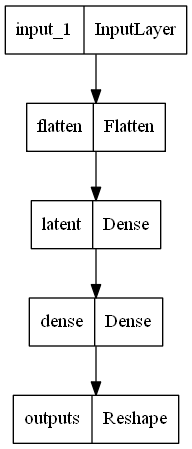

In [10]:
plot_model(model, "C:/workspace/autoencoder/01_study/my_first_model.png")

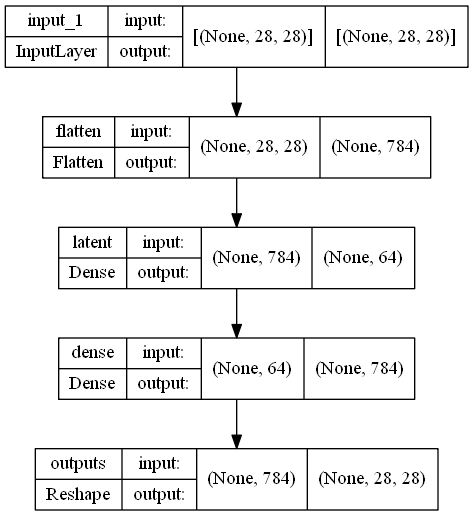

In [11]:
plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)

In [12]:
model.compile(
    optimizer=keras.optimizers.Adam(),  # Optimizer
    # Loss function to minimize
    loss=keras.losses.MeanSquaredError(),
    # List of metrics to monitor
    metrics=[keras.metrics.Mean()],
)

In [13]:
print("Fit model on training data")
history = model.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test),
)

SyntaxError: unmatched ')' (2530045261.py, line 6)